# Importing Libraries

In [551]:
#basic
import numpy as np
import pandas as pd
import geopandas as gpd

#visaualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sql
import mysql.connector


#warnings
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)


# Importing Data

In [552]:
#connection=mysql.connector.connect(
    #host='18.136.157.135',
    #user='dm_team3',
    #password='DM!$!Team!27@9!20&',
    #database='project_telecom')

In [553]:
#tables=pd.read_sql_query('show tables', connection)
#tables

In [554]:
#df=pd.read_sql_query('SELECT * from telecom_churn_data', connection)

In [555]:
df=pd.read_csv('customer_churn')

In [556]:
usa_states = gpd.read_file('geojson.json')

In [557]:
# Dictionary mapping state names to abbreviations
state_abbr = {
    'Maine': 'ME',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Montana': 'MT',
    'Nevada': 'NV',
    'New Jersey': 'NJ',
    'New York': 'NY',
    'North Carolina': 'NC',
    'Ohio': 'OH',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Washington': 'WA',
    'Wisconsin': 'WI',
    'Puerto Rico': 'PR',
    'Maryland': 'MD',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Nebraska': 'NE',
    'New Hampshire': 'NH',
    'New Mexico': 'NM',
    'North Dakota': 'ND',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'West Virginia': 'WV',
    'Wyoming': 'WY'
}

# Add abbreviation column to GeoDataFrame
usa_states['state'] = usa_states['NAME'].map(state_abbr)


In [558]:
usa_states.drop(columns=['GEO_ID', 'STATE', 'LSAD', 'CENSUSAREA'], inplace=True)

In [559]:
df.head()

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [560]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [561]:
df.columns=['state', 'account_length', 'area_code', 'phone', 'international_plan', 'vmail_plan', 'vmail_message', 'day_mins',
            'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 
            'international_mins', 'international_calls', 'international_charge', 'custServ_calls', 'churn']

In [562]:
df.head(1)

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.


In [564]:
df.shape

(4617, 21)

In [565]:
df=df.merge(usa_states, on='state', how='left')

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   state                 4617 non-null   object  
 1   account_length        4617 non-null   int64   
 2   area_code             4617 non-null   int64   
 3   phone                 4617 non-null   object  
 4   international_plan    4617 non-null   object  
 5   vmail_plan            4617 non-null   object  
 6   vmail_message         4617 non-null   int64   
 7   day_mins              4617 non-null   float64 
 8   day_calls             4617 non-null   int64   
 9   day_charge            4617 non-null   float64 
 10  eve_mins              4617 non-null   float64 
 11  eve_calls             4617 non-null   int64   
 12  eve_charge            4617 non-null   float64 
 13  night_mins            4617 non-null   float64 
 14  night_calls           4617 non-null   int64   
 15  nigh

- There are 4617 entries and 21 features
- Every column has 4617 non-null values indicating that there are no missing values in the data
- Memory consumed by the data is around 758 Kb

In [568]:
df.duplicated().any()

False

In [569]:
df.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- The account_length column has a minimum value of 1 and a maximum value of 243.
- The vmail_message column has a minimum value of 0 and a maximum value of 51. On an average, customers sent around 8 voice mail messages.
- Customers made around 100 calls on an average during day, evening and night which made dataset balanced in that respect.
- On an average, customers talked on 180.44 mins during the day, 200.42 mins during evening, and 200.62 mins during night. This means customers tend to spend more time talking during evening and night than day. 
- The average calling charges for evening ($17) and night($9) is much lower that day($30). Average international calling charge is around $3 which is signifantly lesser.
- Customers spend around 10 mins on international calls. Average international calling charge is around $3 which is significantly lesser.
- There are some customers who make very long calls during the day and even thought they have to pay high charges.
- The international_mins column has a maximum value of 20, which suggests that there might be some outliers or high-value customers in this category.
- The custServ_calls column has a maximum value of 9, which indicates that some customers had to contact customer service multiple times, and it might be interesting to explore why they had to do so.

In [570]:
df.describe(include='O')

,state,phone,international_plan,vmail_plan,churn,NAME
count,4617,4617,4617,4617,4617,4617
unique,51,4617,2,2,2,51
top,WV,382-4657,no,no,False.,West Virginia
freq,149,1,4171,3381,3961,149


- There are 51 unique states represented in the dataset.
- Each phone number in the dataset is unique, which indicates that it can be used as a unique identifier for each customer.
- Most of the customers (4171 out of 4617) do not have an international plan.
- A significant number of customers (3381 out of 4617) do not have a voicemail plan.
- There are 3961 customers who did not churn, and only 656 customers churned. This suggests that the dataset may be imbalanced, and some additional analysis may be required to handle this.

In [571]:
def modify_churn(x):

    if x==' True.':
        return 1
    else:
        return 0
    
    

In [572]:
df['churn']=df['churn'].apply(modify_churn)

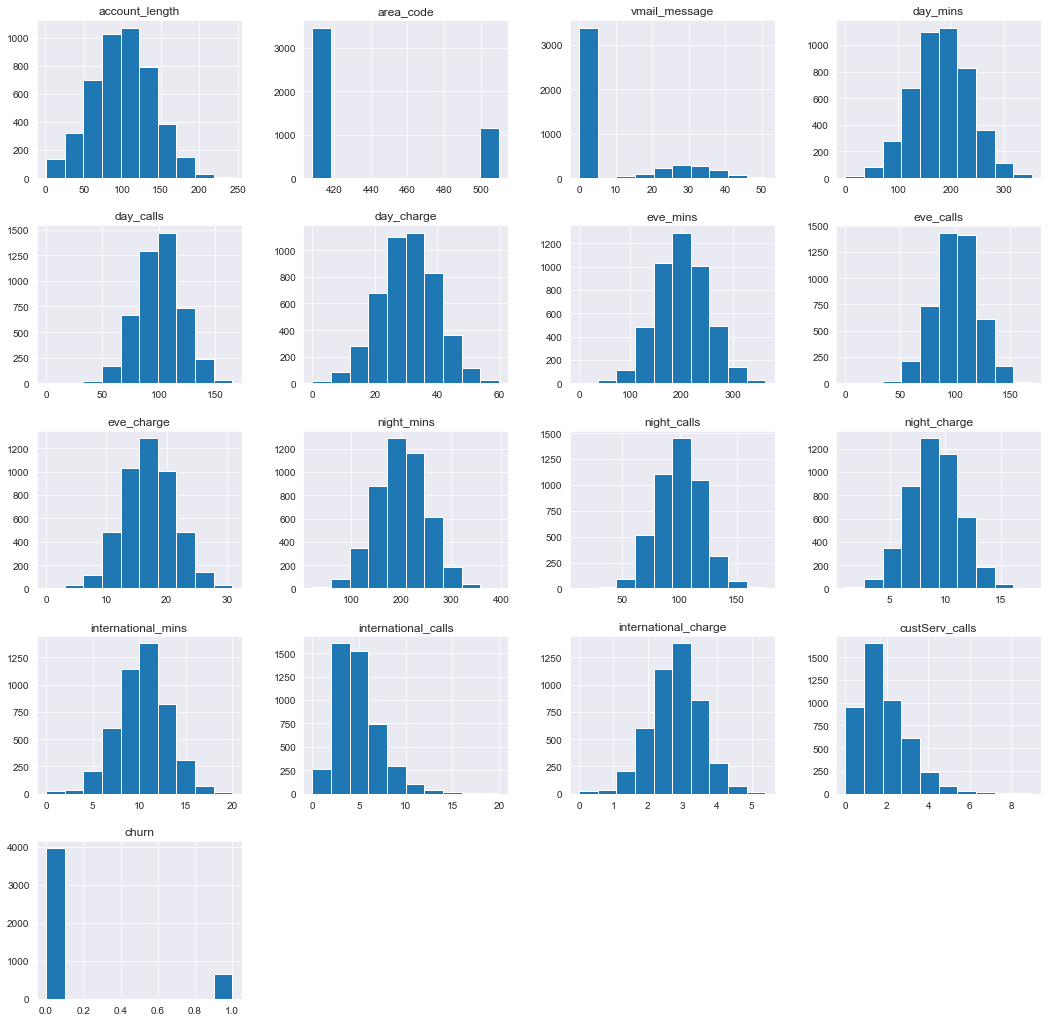

In [573]:
df.hist(figsize=(18,18));

- Almost all the numerical columns are normally distributed.
- Since most of the customer have opted out for voice mail plan, we can notice that there are significantly large number of customers who did not send voice mail messages.
- International calls and customer service calls appeared slightly right skewed.

# Creating Test Set

Setting aside a portion of the data during the initial stages of machine learning may seem counterintuitive. But, relying solely on initial observations can lead to overfitting and data snooping bias. Splitting the data into a training set and testing set early on helps to avoid these risks and leads to a more accurate and effective system. Hence, we will only split train and test set at this point and not the the features and lables.

In [574]:
from sklearn.model_selection import train_test_split

In [575]:
# splitting train and test set
churn_train, churn_test= train_test_split(df, test_size=0.2, random_state=42)

In [576]:
print('df', df.shape)
print('churn_train', churn_train.shape)
print('churn_test', churn_test.shape)

df (4617, 23)
churn_train (3693, 23)
churn_test (924, 23)


In [577]:
# creating a copy of both sets
train= churn_train.copy()
test=churn_test.copy()

# Exploratory Data Analysis

## Univariate

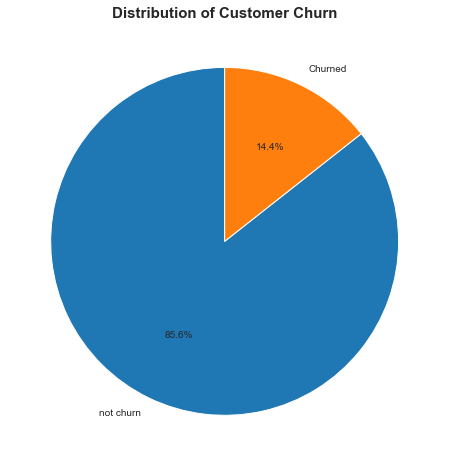

In [578]:
# number of customers who churned and who did not churn
churn_count = train['churn'].value_counts()

# pie chart to visualize the distribution of customer churn
labels = ['not churn', 'Churned']
sizes = churn_count.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Churn', fontsize=15, fontweight='bold');


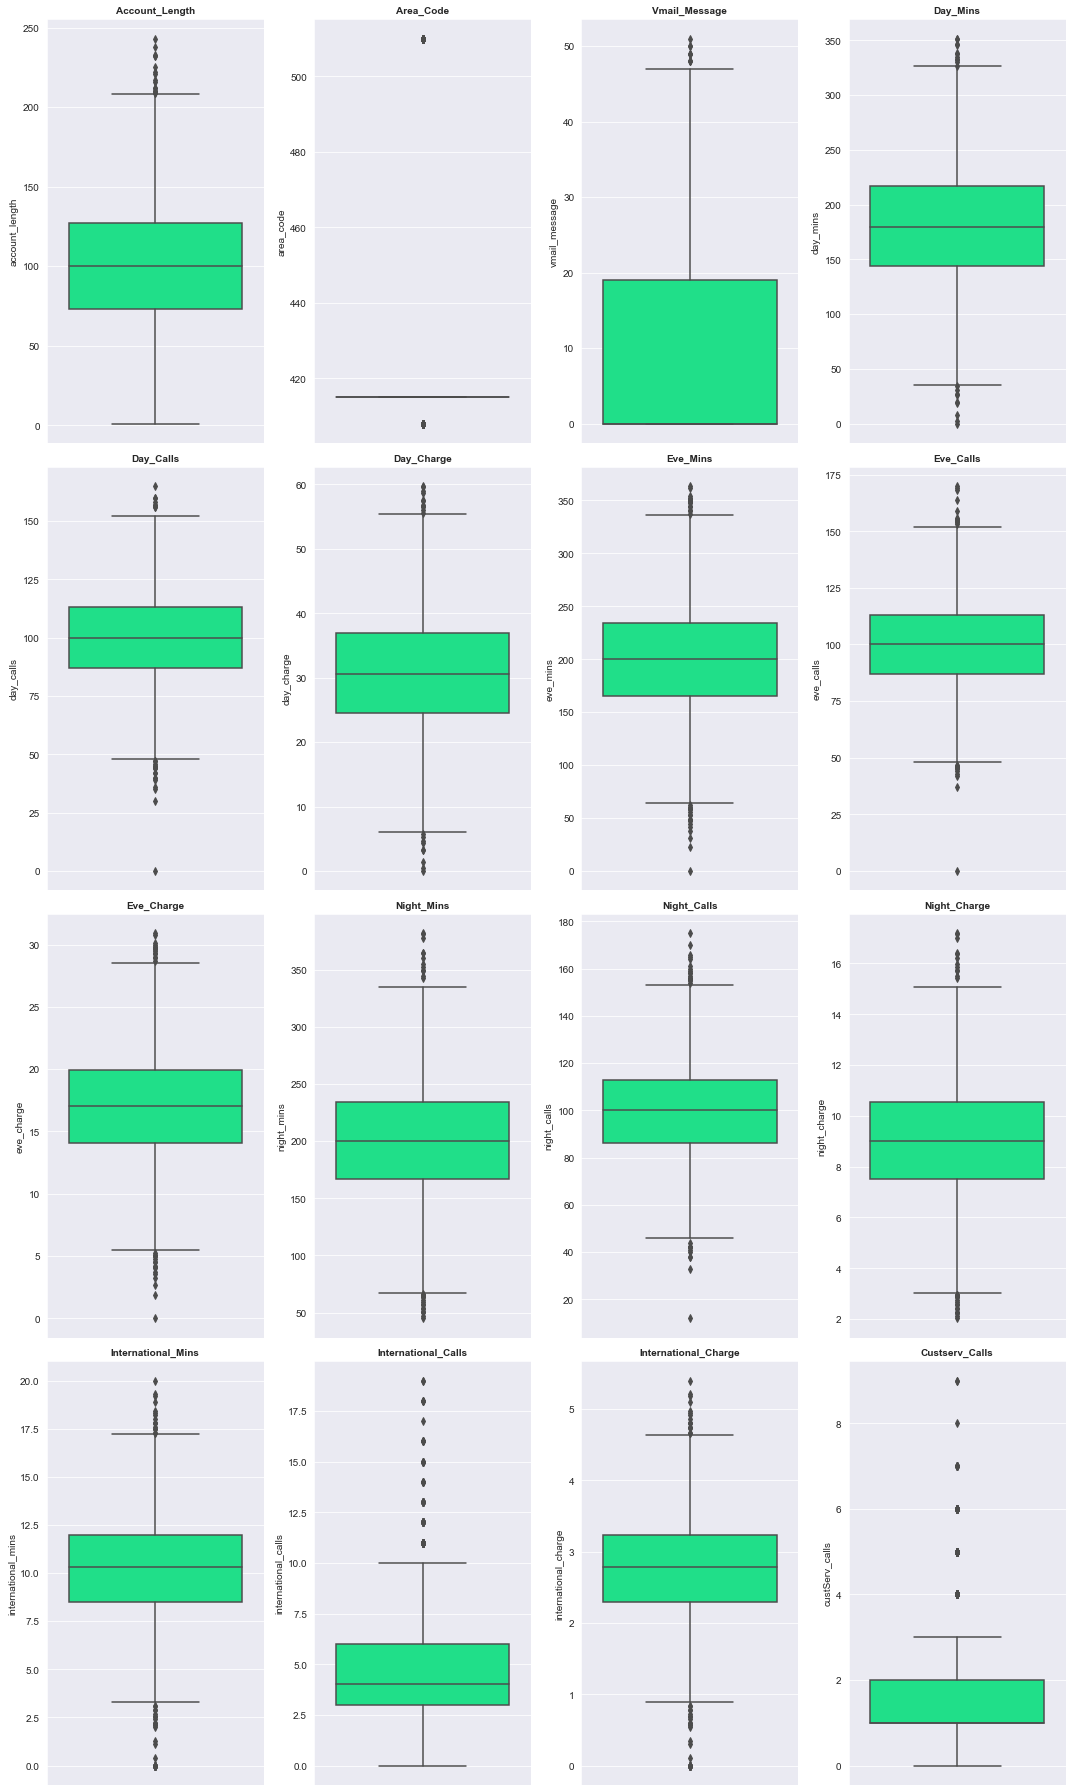

In [579]:
#Extracting numerical columns
num_cols=[]
for col in train.columns:
    if train[col].dtype!='object':
        num_cols.append(col)

fig, ax=plt.subplots(4,4, figsize=(15,25))

for column, ax in zip(num_cols, ax.flatten()):
    sns.boxplot(y=column, data=train, ax=ax, palette='gist_rainbow')
    ax.set_title(column.title(), fontsize=10, fontweight='bold')
plt.tight_layout();

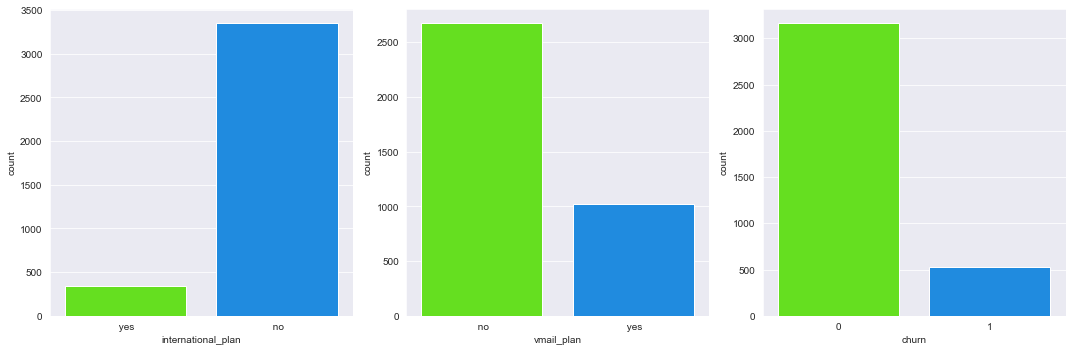

In [580]:
cat_columns = ['international_plan', 'vmail_plan', 'churn']

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for cat, ax in zip(cat_columns, axs.flatten()):
    sns.countplot(x=cat, data=train, ax=ax, palette='gist_rainbow')
plt.tight_layout()


In [581]:
df.churn.value_counts(normalize=False)

0    3961
1     656
Name: churn, dtype: int64

- The dataset is evidently imbalanced.
- The imbalance is not just limited to target variable but also to independent variables
- The frequency distribution shows a class imbalance, with the "no" category being much more prevalent than the "yes" category.
- The presence or absence of an international plan may be an important feature in predicting customer churn, as it could indicate a higher or lower level of engagement with the telecom provider's services.
- The count of "no" values in the vmail_plan is 2673, which is significantly higher than the count of "yes" values, which is 1020.
- This suggests that a large majority of customers (almost 74%) do not have a voicemail plan.
- There are 3162 instances of "False." in the column "churn", which indicates that a large majority (about 85%) of the customers in the dataset did not churn.
- On the other hand, there are 631 instances of "True." in the column "churn", which indicates that a relatively small minority (about 14%) of the customers in the dataset churned.

# Bivariate

In [582]:
train.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls,churn,NAME,geometry
3189,WA,76,510,345-6961,yes,no,0,246.8,110,41.96,206.3,63,17.54,208.4,123,9.38,13.2,5,3.56,0,1,Washington,"MULTIPOLYGON (((-123.09055 49.00198, -123.0353..."
2646,NC,101,415,354-2985,no,no,0,232.7,114,39.56,186.4,123,15.84,153.3,122,6.90,11.5,6,3.11,5,0,North Carolina,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ..."
506,OH,136,415,407-2248,no,yes,31,143.1,88,24.33,236.6,65,20.11,227.8,120,10.25,11.4,5,3.08,2,0,Ohio,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ..."
393,PA,112,510,352-9017,no,no,0,217.1,76,36.91,205.2,100,17.44,185.7,91,8.36,9.4,3,2.54,2,0,Pennsylvania,"POLYGON ((-75.41504 39.80179, -75.42804 39.809..."
1183,IN,154,510,389-2631,no,yes,32,192.3,82,32.69,165.3,134,14.05,205.0,74,9.23,9.0,1,2.43,2,0,Indiana,"POLYGON ((-88.02803 37.79922, -88.02938 37.803..."


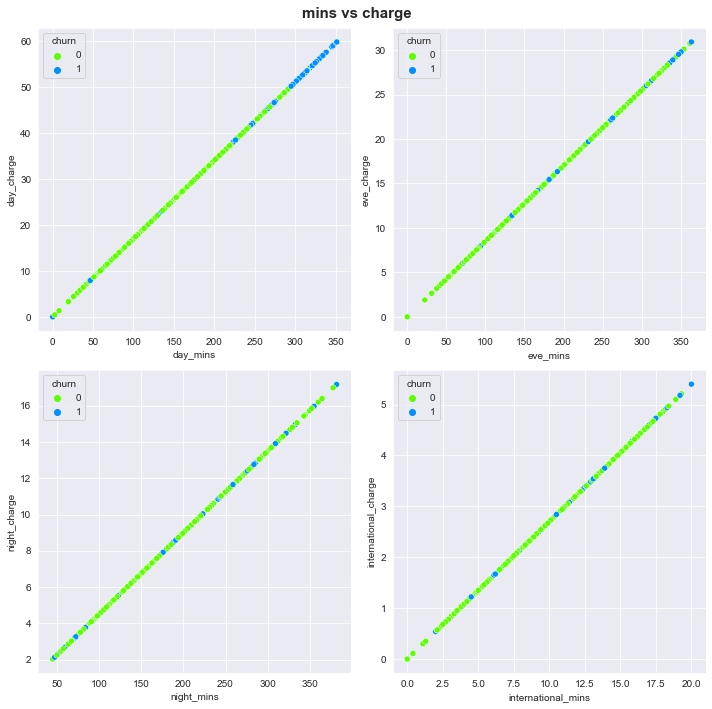

In [583]:
types = ['day', 'eve', 'night', 'international']

fig, ax = plt.subplots(2,2, figsize=(10,10))

for type, ax in zip(types, ax.flatten()):
    sns.scatterplot(x=type+"_mins", y=type+"_charge", data=train, ax=ax, hue="churn", palette='gist_rainbow');

plt.suptitle('mins vs charge', fontsize=15, fontweight='bold')
plt.tight_layout()



- We can clearly see that more the talking mimutes more are the charges. Two features are strongly correlated for each type(day, eve, night, international)
- This finding will help us reduce the dimentionality of the dataset
- In the first plot, we can also observe that the orange dots are concentrated on the top right side, indicating that customer who left used to talk more during day time and hence paid more charges

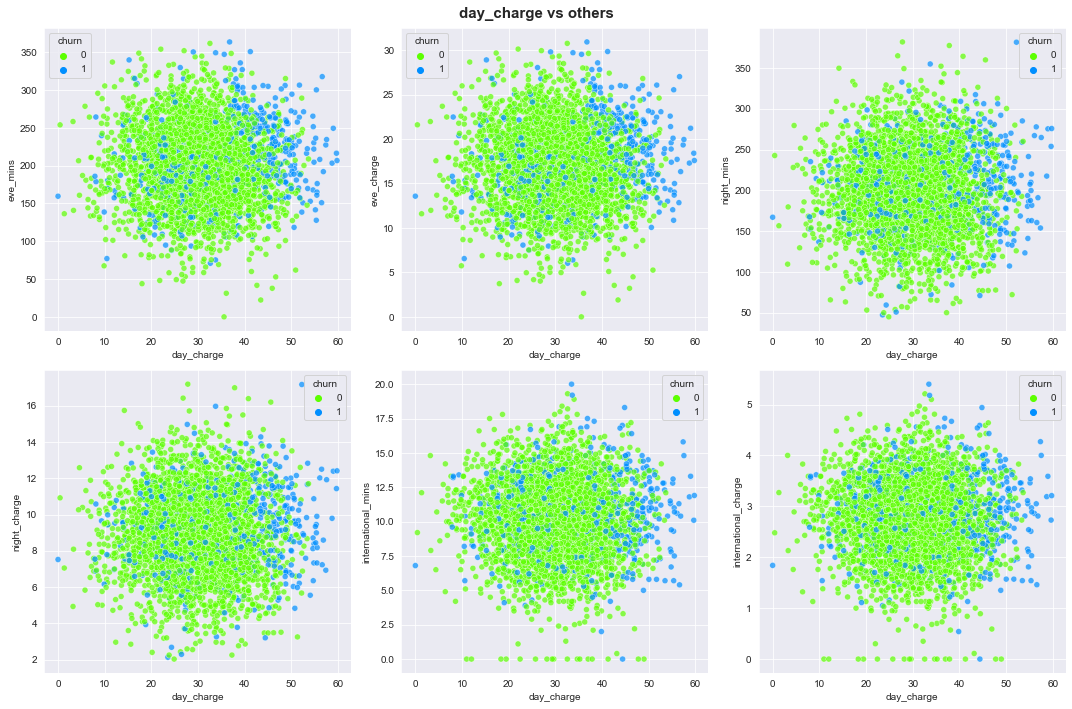

In [584]:
relations=['eve_mins', 'eve_charge', 'night_mins', 'night_charge', 'international_mins', 'international_charge']

fig, ax = plt.subplots(2,3, figsize=(15,10))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='day_charge', y=relation, data=train, alpha=0.7, ax=ax, palette='gist_rainbow', hue="churn");

plt.suptitle('day_charge vs others', fontsize=15, fontweight='bold')
plt.tight_layout()


- From the above plots, color differentiation help us notice that orange dots are concentrated on the right side of the plots. This implies, customer switched to competitors had spend more time talking on call during day time and, as a result, paid higher day charge.
- These scatterplot suggest that day charges might be the strong reason for customer churn

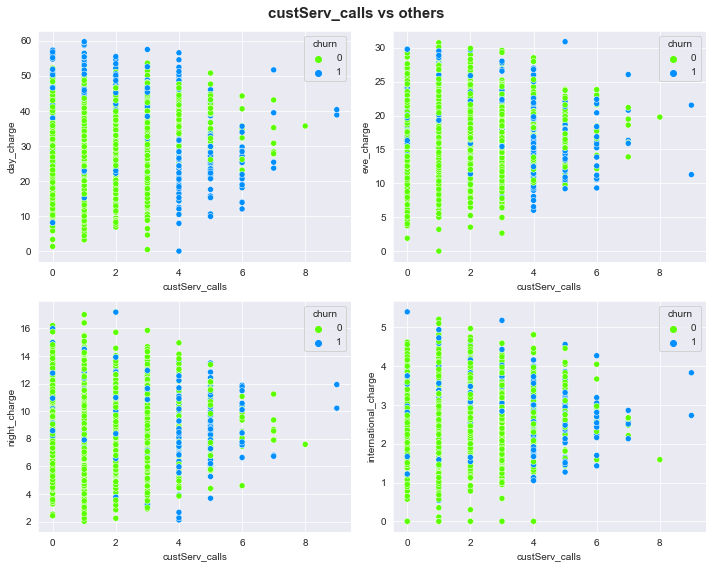

In [585]:
relations=['day_charge', 'eve_charge', 'night_charge', 'international_charge']

fig, ax = plt.subplots(2,2, figsize=(10,8))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='custServ_calls', y=relation, data=train, ax=ax, hue="churn", palette='gist_rainbow');

plt.suptitle('custServ_calls vs others', fontsize=15, fontweight='bold')
plt.tight_layout()

- Green dots are crowded on the side where customers had called customer service more number of times.
- Approximately, customers who made 4 or more calls were likey to churn more
- From the first graph, we can see that day charge also contribute in churning of customers as green dots are gathered on the top side as well

 ### Comparison of churn rate between customers with and without international plan:

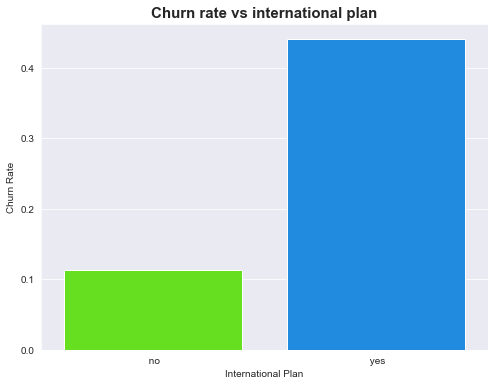

In [586]:
# Group the data by international_plan and churn and count the number of occurrences
churn_by_intlplan = train.groupby(['international_plan', 'churn']).size().unstack()

# Calculate the churn rate for each group
churn_by_intlplan['churn_rate'] = churn_by_intlplan[1] / (churn_by_intlplan[0] + churn_by_intlplan[1])

# Plot the churn rate for each group
plt.figure(figsize=(8,6))
sns.barplot(x='international_plan', y='churn_rate', data=churn_by_intlplan.reset_index(), palette='gist_rainbow')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.title('Churn rate vs international plan', fontsize=15, fontweight='bold');

- In the group without an international plan, there were 2969 customers who did not churn and 379 customers who churned. This gives a churn rate of 
11.3%.
- In the group with an international plan, there were 193 customers who did not churn and 152 customers who churned. This gives a higher churn rate of 44.1%.
- Therefore, it appears that customers with an international plan are more likely to churn than customers without an international plan.

### Top States where customer churned the most

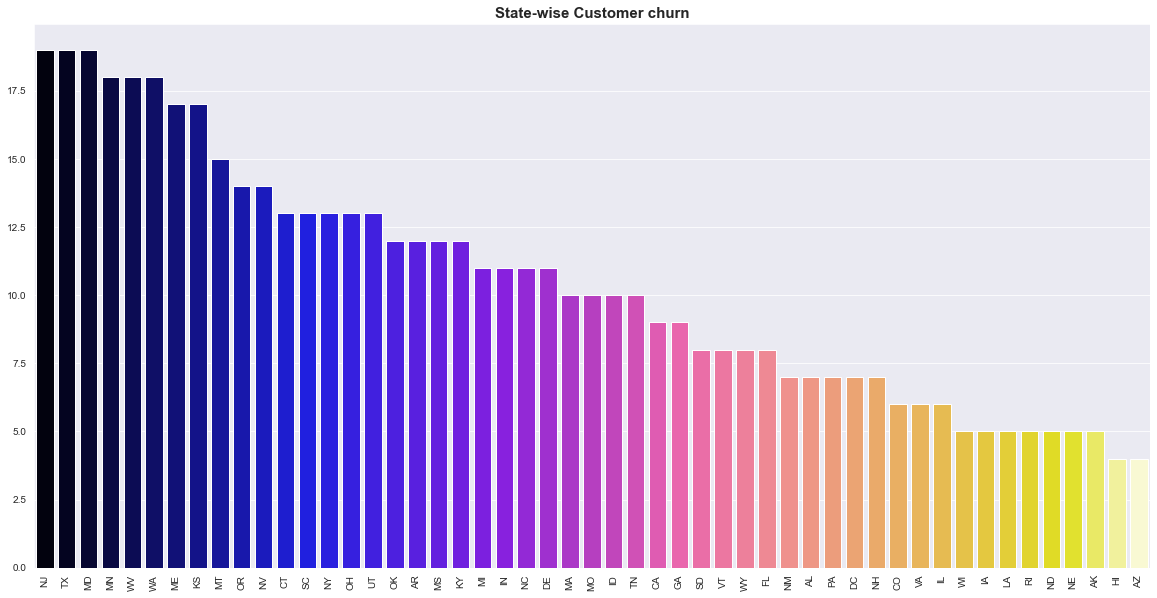

In [587]:
churned= train[train['churn']==1].groupby('state')['area_code'].count().sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(list(churned.keys()), list(churned.values), palette='gnuplot2')
plt.xticks(rotation=90)
plt.title('State-wise Customer churn', fontsize=15, fontweight='bold');

- The number of customers who churned varies across different states, with the highest number being 19 and the lowest being 4.
- The top 5 states with the highest number of customers churned are NJ, TX, and MD with 19 customers churned each, followed by MN, WV, and WA with 18 customers churned each.
- The bottom 5 states with the lowest number of customers churned are WI, IA, LA, RI, ND, and NE, all with only 5 customers churned each.

Let's also compare the number of customer churned in each state to the total number of customers in that state. This would give us a churn rate for each state, which could be a better metric for identifying problem areas. For example, if a state has a high churn rate despite having a low number of customer churned, it could indicate that the company has a larger customer base in that state, and therefore, the problem is more significant than it appears.

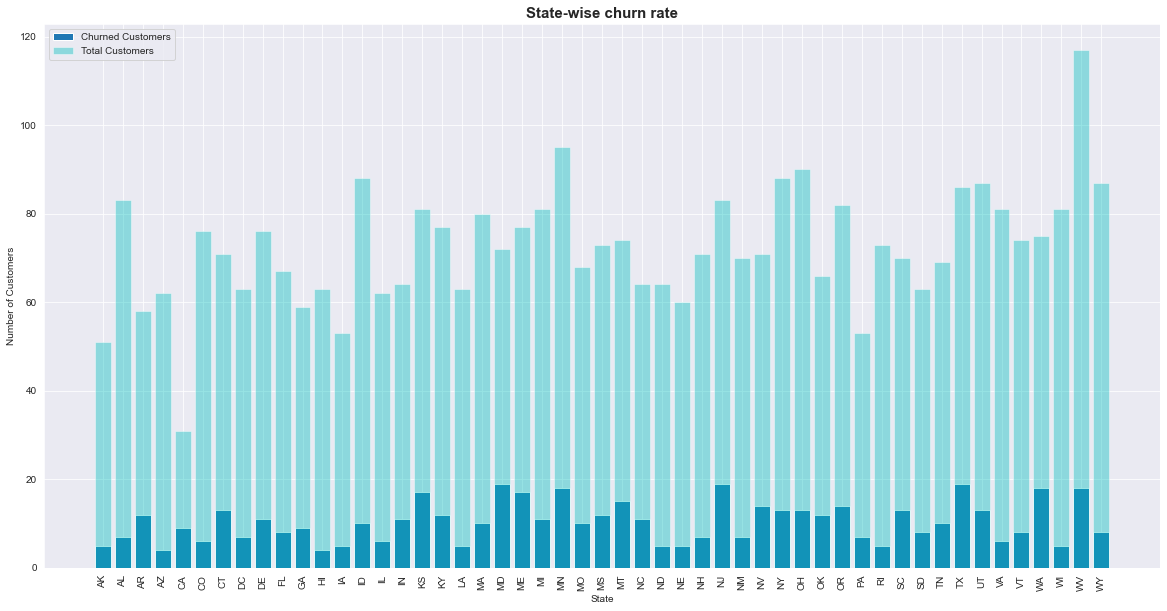

In [588]:
# the churn rate for each state
churn_rate = train.groupby('state')['churn'].mean()

# total number of customers for each state
total_customers = train['state'].value_counts()

# churned customers for each state
churned_customers = churn_rate * total_customers

# bar plot for churned customers and total customers by state
plt.subplots(figsize=(20, 10))
plt.bar(churned_customers.index, churned_customers.values, label='Churned Customers')
plt.bar(total_customers.index, total_customers.values, alpha=0.4, label='Total Customers', color='c')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend()
plt.xticks(rotation=90)
plt.title('State-wise churn rate', fontsize=15, fontweight='bold');

- The state with the highest churn rate is MD (Maryland) with 19 out of 72 customers churning, which is around 26.4% churn rate.
- MN (Minnesota) has the second-highest churn rate with 18 out of 95 customers churning, which is around 18.9% churn rate.
- WV (West Virginia) has the third-highest churn rate with 18 out of 117 customers churning, which is around 15.4% churn rate.
- The states with the lowest churn rates are HI (Hawaii), AZ (Arizona), and GA (Georgia) with only 4 out of 63, 4 out of 62, and 9 out of 59 customers churning, respectively. This gives a churn rate of around 6.3%, 6.5%, and 15.3%, respectively.
- There seems to be no clear relationship between the number of customers in a state and the churn rate. 

## GeoSpaital Visualisations

In [634]:
train1=train.copy()
train1['international_plan']=train1['international_plan'].replace({' yes':1, ' no':0})

# Calculate proportion of customers with international plan by state
int_plan_prop = train1.groupby('state')['international_plan'].mean()

# Merge with usa_states GeoDataFrame
usa_states_int = usa_states.merge(int_plan_prop, left_on='state', right_index=True)

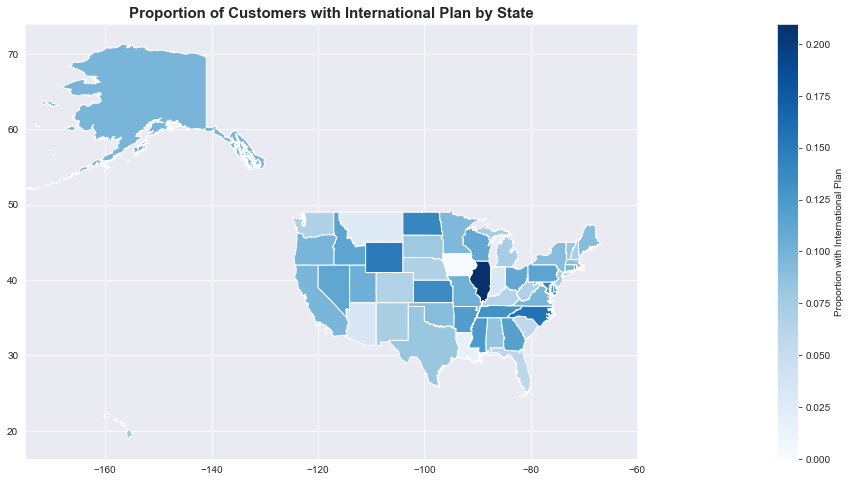

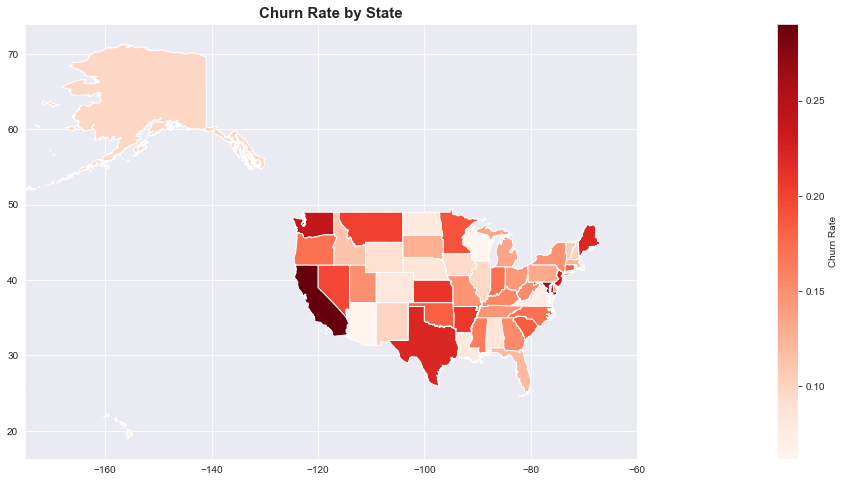

In [644]:
# Create choropleth map of international plan proportion by state
fig, ax = plt.subplots(figsize=(50, 8))
usa_states_int.plot(column='international_plan', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': "Proportion with International Plan"})
plt.xlim([-175,-60])
ax.set_title("Proportion of Customers with International Plan by State", fontsize=15, fontweight='bold')

# Calculate churn rate by state
churn_rate = train1.groupby('state')['churn'].mean()

# Merge with usa_states_int GeoDataFrame
usa_states_churn = usa_states_int.merge(churn_rate, left_on='state', right_index=True)

# Create choropleth map of churn rate by state
fig, ax = plt.subplots(figsize=(50, 8))
usa_states_churn.plot(column='churn', cmap='Reds', ax=ax, legend=True, legend_kwds={'label': "Churn Rate"})
plt.xlim([-175,-60])
ax.set_title("Churn Rate by State", fontsize=15, fontweight='bold');


## Multivariate

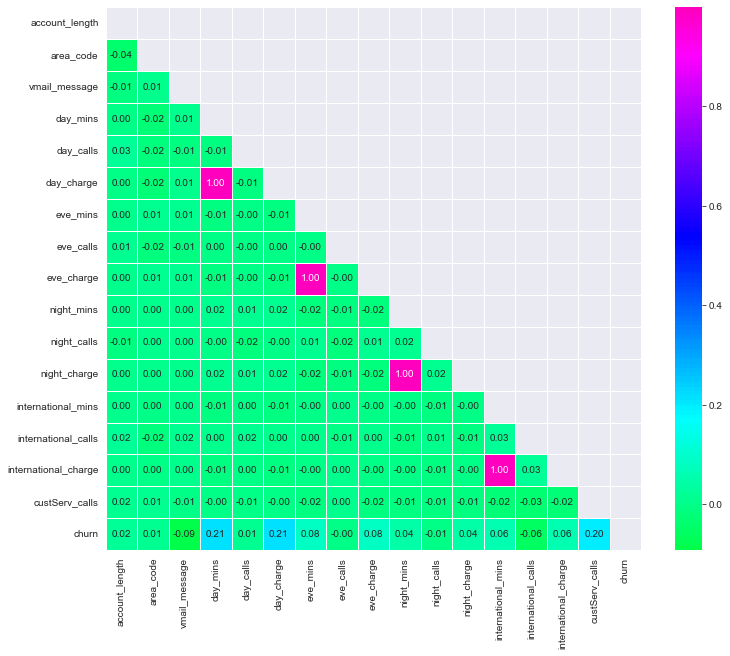

In [651]:
corr= train.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), mask=mask, center=0, cmap='gist_rainbow', linewidths=1, annot=True, fmt='.2f');

In [653]:
train.corr()['churn']

account_length          0.023752
area_code               0.011719
vmail_message          -0.092288
day_mins                0.214672
day_calls               0.012439
day_charge              0.214673
eve_mins                0.080042
eve_calls              -0.000884
eve_charge              0.080043
night_mins              0.044747
night_calls            -0.005392
night_charge            0.044741
international_mins      0.061066
international_calls    -0.055208
international_charge    0.061035
custServ_calls          0.199140
churn                   1.000000
Name: churn, dtype: float64

# Data Processing

## Dropping Irrelevant columns

In [659]:
train.drop(columns=['state', 'area_code', 'phone', 'NAME', 'geometry'], inplace=True)
test.drop(columns=['state', 'area_code', 'phone', 'NAME', 'geometry'], inplace=True)

In [664]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

## Encoding

In [665]:
#international_plan
train['international_plan']=train['international_plan'].replace({' yes':1, ' no':0})
test['international_plan']=test['international_plan'].replace({' yes':1, ' no':0})
#vmail_plan
train['vmail_plan']=train['vmail_plan'].replace({' yes':1, ' no':0})
test['vmail_plan']=test['vmail_plan'].replace({' yes':1, ' no':0})

## Outliers

In [670]:
from MGD_Outliers import OutlierNinja

In [675]:
data=train.drop(columns=['international_plan', 'vmail_plan', 'churn'])

In [676]:
outliers=OutlierNinja()
outliers.fit(data)

'Upper and lower limits identified successfully!'

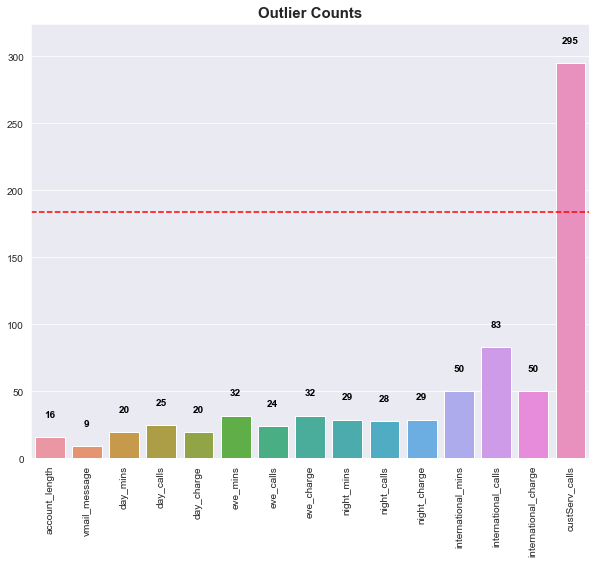

In [677]:
outliers.plot_outlier_count()

- It seems that all the numeric columns have outliers
- All the column except custServ_calls have lesser outliers than 5%
- Only custServ_call have highest number outliers which is almost 8% 

It seems that values more than 3 in custServ_calls considered to the outliers. Dropping these values does not make sense as it is quite possible that customers can make more than 3 calls to customer service. Dropping these outliers leads to missing out on the big proportion of the data. So, we will not drop these outliers as they would still not be considered as extreme values

## Multi-collinearity

- From the scatter plots and correlation heatmap, we observed that mins column is strongly correlated with charge columns for day, evening, night and international calling
- We will drop all mins columns and keep charge columns as charge column would be representative of calling minutes and charge per miniute.

In [683]:
train.drop(columns=['day_mins', 'eve_mins', 'night_mins', 'international_mins'], inplace=True)
test.drop(columns=['day_mins', 'eve_mins', 'night_mins', 'international_mins'], inplace=True)

## Splitting Features and Labels

In [698]:
#train
X_train=train.drop('churn', axis=1)
y_train=train.churn

#test
X_test=test.drop('churn', axis=1)
y_test=test.churn

## Scaling

In [699]:
scaler=StandardScaler()

In [700]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Balacing the data

In [701]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [702]:
smote=SMOTE(random_state=42)

In [703]:
X_train_smote, y_train_smote= smote.fit_resample(X_train_scaled, y_train)

In [704]:
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 3162, 1: 531})
SMOTE Classes Counter({1: 3162, 0: 3162})


# Model Development

In [756]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, roc_auc_score

#cross_validation
from sklearn.model_selection import cross_val_score,KFold, cross_val_predict

In [710]:
def check_result(test, pred):
  """
    Prints out the classification report, accuracy score, precision score, F1 score, ROC AUC score, and confusion matrix
    for a given set of test and predicted labels.

    Args:
        test (array-like of shape (n_samples,)): Ground truth (correct) target values.
        pred (array-like of shape (n_samples,)): Estimated targets as returned by a classifier.

    Returns:
        None
    """
    
  print(classification_report(test, pred))
  print('=========================================')
  print('Accuracy', accuracy_score(test, pred))
  print('=========================================')
  print('precision', precision_score(test, pred))
  print('=========================================')
  print('F1 score', f1_score(test, pred))
  print('=========================================')
  print('ROC AUC score', roc_auc_score(test, pred))
  print('=========================================')
  print('Confusion matrix')
  print(confusion_matrix(test, pred))

### Logistic Regression

In [711]:
lr=LogisticRegression()

In [748]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scorer=make_scorer(f1_score)

cv_scores_lr=cross_val_score(lr, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_lr

array([0.77162899, 0.78930308, 0.79512567, 0.78787879, 0.77212216])

### KNN

In [716]:
knn=KNeighborsClassifier()

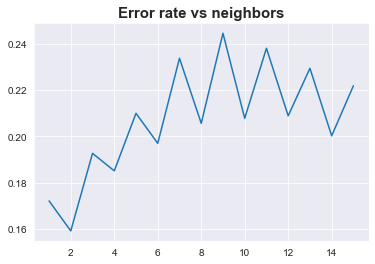

In [720]:
error_rate=[]

for k in range(1, 16):
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_smote, y_train_smote)
    pred_k= knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test.values))

plt.plot(np.arange(1,16), error_rate)
plt.title('Error rate vs neighbors', fontsize=15, fontweight='bold');

In [747]:
knn=KNeighborsClassifier(n_neighbors=6, n_jobs=-1)

cv_scores_knn=cross_val_score(knn, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_knn

array([0.90571641, 0.89826677, 0.93915533, 0.90636704, 0.91094891])

### Support Vector Classifier

In [723]:
svc=SVC()

In [749]:
cv_scores_svc=cross_val_score(svc, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_svc

array([0.88182559, 0.89816361, 0.90428016, 0.91625616, 0.90064103])

### Decision Tree

In [725]:
tree=DecisionTreeClassifier()

In [753]:
cv_scores_tree=cross_val_score(tree, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_tree

array([0.91007752, 0.92394822, 0.93512304, 0.91547049, 0.91803279])

### Random Forest

In [727]:
rf= RandomForestClassifier()

In [752]:
cv_scores_rf=cross_val_score(rf, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_rf

array([0.94996029, 0.96608768, 0.96273764, 0.96596434, 0.96025437])

### Gradient Boost

In [729]:
gb=GradientBoostingClassifier()

In [754]:
cv_scores_gb=cross_val_score(gb, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_gb

array([0.92506044, 0.93553719, 0.93577982, 0.93561532, 0.93929712])

### XGBoost

In [731]:
xgb=XGBClassifier()

In [755]:
cv_scores_xgb=cross_val_score(xgb, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_xgb

array([0.96031746, 0.97440132, 0.97354497, 0.97389886, 0.96425735])

### MLP Classifier

In [759]:
mlp=MLPClassifier()

In [760]:
cv_scores_mlp=cross_val_score(mlp, X_train_smote, y_train_smote, cv=kf, scoring=scorer)
cv_scores_mlp

array([0.92501973, 0.93376942, 0.93140244, 0.94391026, 0.9241595 ])

## Comparing Cross Validation Scores

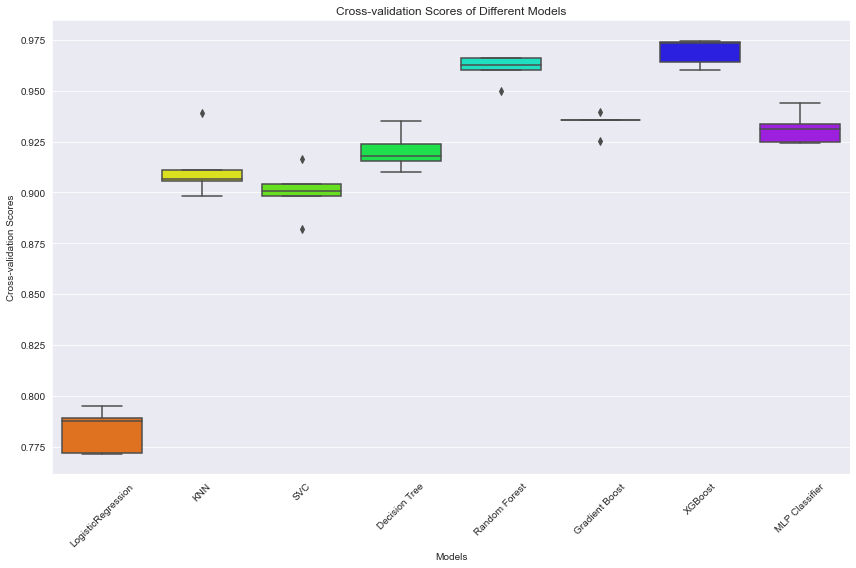

In [795]:
cv_scores = {
    'LogisticRegression': cv_scores_lr,
    'KNN': cv_scores_knn,
    'SVC': cv_scores_svc,
    'Decision Tree': cv_scores_tree,
    'Random Forest': cv_scores_rf,
    'Gradient Boost': cv_scores_gb,
    'XGBoost': cv_scores_xgb,
    'MLP Classifier': cv_scores_mlp
}

plt.figure(figsize=(12, 8))
sns.boxplot(data=list(cv_scores.values()), palette='gist_rainbow')
plt.xticks(ticks=range(len(cv_scores.keys())), labels=cv_scores.keys(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Cross-validation Scores')
plt.title('Cross-validation Scores of Different Models')
plt.tight_layout()
plt.show()



- Logistic Regression has relatively lower scores compared to other models, ranging from 0.7716 to 0.7951.
- K-Nearest Neighbors (KNN) performs well with scores ranging from 0.8983 to 0.9392, showing consistent performance across folds.
- Support Vector Classifier (SVC) also performs consistently well with scores ranging from 0.8818 to 0.9163.
- Decision Tree achieves scores ranging from 0.9101 to 0.9351, indicating a stable performance.
- Random Forest exhibits high scores ranging from 0.9499 to 0.9661, suggesting strong predictive capabilities.
- Gradient Boosting performs consistently well, with scores ranging from 0.9251 to 0.9393.
- XGBoost shows excellent performance with scores ranging from 0.9603 to 0.9744, indicating high predictive power.
- MLP Classifier achieves scores ranging from 0.9242 to 0.9439, demonstrating competitive performance.

Based on these observations, the top two models to consider for selection are:

- XGBoost: It consistently achieves the highest scores among all models and shows robust performance across different folds.

- Random Forest: It also exhibits high scores and performs consistently well, making it another strong contender for selection.

These two models, XGBoost and Random Forest, stand out as top performers and are recommended for further evaluation and comparison based on other factors such as model complexity, interpretability, computational requirements, and specific objectives of the task.

## Performance evaluation on Test set

### Random Forest

In [801]:
rf.fit(X_train_scaled, y_train)
y_pred_rf=rf.predict(X_test_scaled)

In [802]:
check_result(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       799
           1       0.94      0.71      0.81       125

    accuracy                           0.95       924
   macro avg       0.95      0.85      0.89       924
weighted avg       0.95      0.95      0.95       924

Accuracy 0.9545454545454546
precision 0.9368421052631579
F1 score 0.8090909090909091
ROC AUC score 0.8522453066332916
Confusion matrix
[[793   6]
 [ 36  89]]


### XGBoost

In [803]:
xgb.fit(X_train_scaled, y_train)
y_pred_xgb=xgb.predict(X_test_scaled)

In [804]:
check_result(y_test, y_pred_xgb)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       799
           1       0.92      0.78      0.84       125

    accuracy                           0.96       924
   macro avg       0.94      0.88      0.91       924
weighted avg       0.96      0.96      0.96       924

Accuracy 0.95995670995671
precision 0.9150943396226415
F1 score 0.8398268398268398
ROC AUC score 0.8823679599499374
Confusion matrix
[[790   9]
 [ 28  97]]


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'